In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import f

f_1 = pd.read_csv('1.txt', sep =',', header = None)
f_2 = pd.read_csv('2.txt', sep =',', header = None)
f_3 = pd.read_csv('3.txt', sep =',', header = None)

f_1

,0,1
0,5.000000,-2.181332
1,5.202020,-3.560503
2,5.404040,-4.288543
3,5.606061,-4.650213
4,5.808081,-5.041542
...,...,...
95,24.191919,-22.500336
96,24.393939,-22.520628
97,24.595960,-24.325499
98,24.797980,-22.016206


# File 1

In [ ]:
alpha = 0.05
n = f_1[0].size
m_x = f_1[0].mean()
m_y = f_1[1].mean()
m_xy = (f_1[0]*f_1[1]).mean()
sx = np.sqrt(sum(f_1[0]**2 - m_x**2)/n)
sy = np.sqrt(sum(f_1[1]**2 - m_y**2)/n)
r = (m_xy - m_x * m_y) / (sx * sy)

print("Коэффициент корреляции Пирсона:", r)

Коэффициент корреляции Пирсона: -0.9852551033152804


abs(r) находится в диапазоне 0.9-0.99, что по шкале Чеддока говорит о том, что связь весьма высока

In [ ]:
from scipy.stats import t

t_stat = np.abs(r) * np.sqrt((n - 2) / (1 - r**2))
ppf = t.ppf(1 - alpha / 2, n - 2)
print(np.abs(t_stat), ' > ', ppf)
print("T-stat больше критического значение, H0 отвергается, следовательно коэффициент корреляции значительно отличается от нуля")

57.007592869402174  >  1.984467454426692
T-stat больше критического значение, H0 отвергается, следовательно коэффициент корреляции значительно отличается от нуля


a = -0.9910753178458555
b = 0.9539851638097776


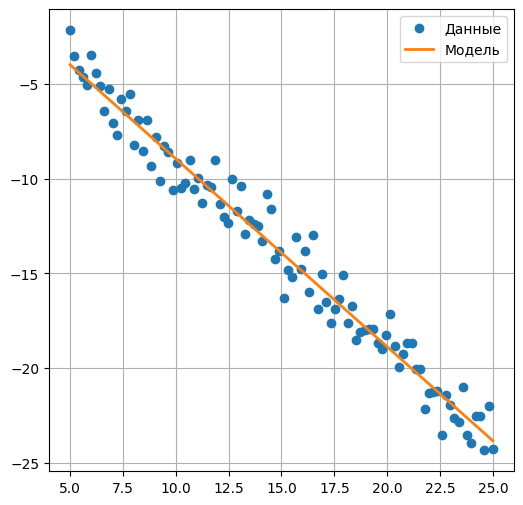

In [ ]:
a = r * np.std(f_1[1]) / np.std(f_1[0])
b = 1 / n * sum(f_1[1]) - a * 1 / n * sum(f_1[0])

print("a =", a)
print("b =", b)

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.plot(f_1[0], f_1[1], 'o', label="Данные")
plt.plot(f_1[0], a * f_1[0] + b, linewidth = 2, label="Модель")
plt.grid()
plt.legend()
plt.show()

In [ ]:
d = 2

s2m = sum((f_1[1] - (a * f_1[0] + b))**2) / (n - d) # дисперсия
s2o = sum((f_1[1] - m_y)**2) / (n - 1) # усредненная дисперсия

f_stat = max(s2m, s2o) / min(s2m, s2o)
ppf = f.ppf(alpha, n - 2, n - 1)
print(f_stat, ' > ', ppf)
print("Fisher-stat  больше критического значение, H0 отвергается, следовательно модель адекватна, дисперсии не равны")

33.8168246945842  >  0.7165989462583362
Fisher-stat  больше критического значение, H0 отвергается, следовательно модель адекватна, дисперсии не равны


In [ ]:
ma = np.sqrt(s2m) / (np.std(f_1[0]) * np.sqrt(n))
mb = np.sqrt(s2m * sum(f_1[0]**2)) / (np.std(f_1[0]) * n)
ta = a / ma
tb = b / mb

df = n - 2 # степени свободы

ppf = t.ppf(1 - alpha / 2, df)

print(np.abs(ta), ' > ', ppf)
print(np.abs(tb), ' > ', ppf)
print("Параметры значимы")

57.007592869404924  >  1.984467454426692
3.4096683311246103  >  1.984467454426692
Параметры значимы


In [ ]:
print("Доверительный интервал для параметра a:")
print(a - ppf * ma, ' < ', a, ' < ', a + ppf * ma)
print("Доверительный интервал для параметра b:")
print(b - ppf * mb, ' < ', b, ' < ', b + ppf * mb)

Доверительный интервал для параметра a:
-1.0255752259134738  <  -0.9910753178458555  <  -0.9565754097782371
Доверительный интервал для параметра b:
0.3987544710455926  <  0.9539851638097776  <  1.5092158565739626


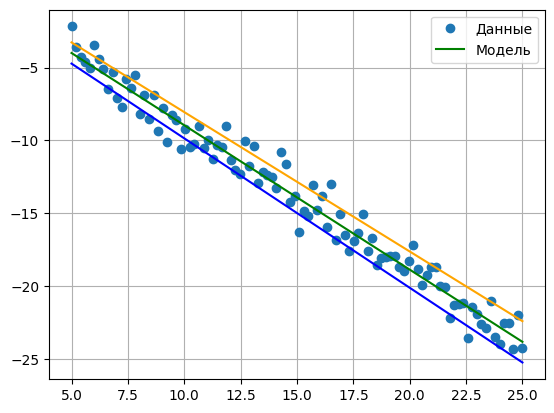

In [ ]:
plt.plot(f_1[0], f_1[1], 'o', label="Данные")
plt.plot(f_1[0], a * f_1[0] + b, 'green', label="Модель")
plt.plot(f_1[0], (a - ppf * ma) * f_1[0] + (b - ppf * mb), 'blue')
plt.plot(f_1[0], (a + ppf * ma) * f_1[0] + (b + ppf * mb), 'orange')
plt.grid()
plt.legend()
plt.show()

In [ ]:
e = ppf * s2m* np.sqrt((1 + (1 / n) + (f_1[0] - m_x)**2 / (n * np.std(f_1[0])**2)))
print(f'[{a * f_1[0][50] + b - e[50]}; {a * f_1[0][50] + b + e[50]}]')

[-16.062084667634686; -11.962421776049874]


# File 2

In [ ]:
def find_ab(x, y): # описано в первом пункте
  n = len(x)
  m_x = x.mean()
  m_y = y.mean()
  m_xy = (x*y).mean()
  s_x = np.sqrt(sum(x**2 - m_x**2)/n)
  s_y = np.sqrt(sum(y**2 - m_y**2)/n)
  r = (m_xy - m_x * m_y) / (s_x * s_y)
  a = r * np.std(y) / np.std(x)
  b = 1 / n * sum(y) - a * 1 / n * sum(x)
  return a, b

Первый признак

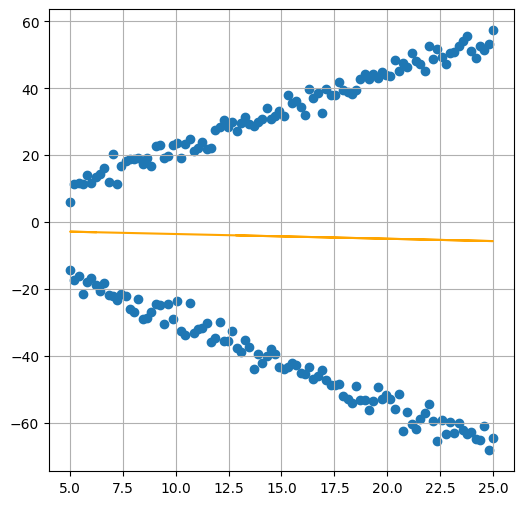

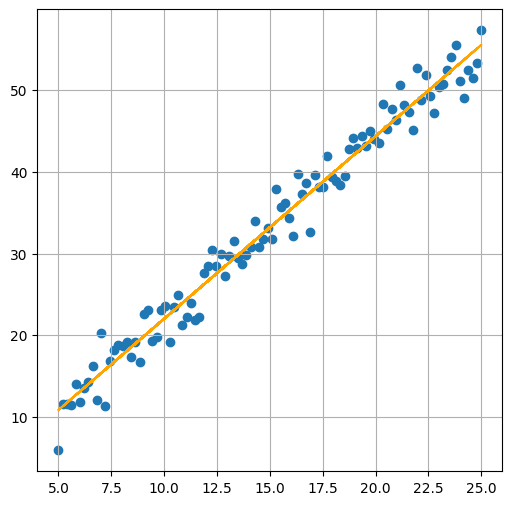

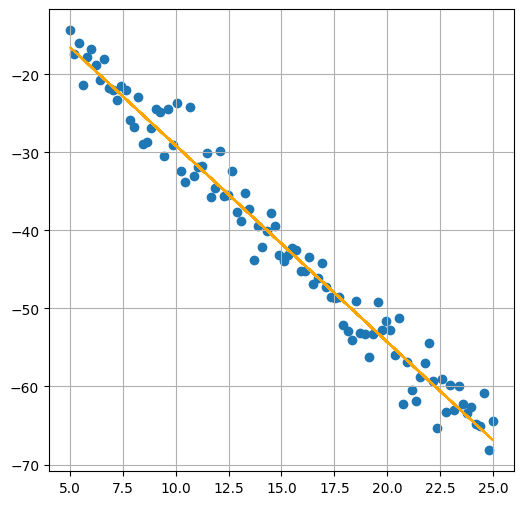

In [ ]:
plt.figure(figsize=(6, 6))
a, b = find_ab(f_2[0], f_2[3])
plt.scatter(f_2[0], f_2[3])
plt.plot(f_2[0], a * f_2[0] + b, 'orange')
plt.grid()
plt.show()

plt.figure(figsize=(6, 6))
df_0 = f_2.loc[(f_2[1] == 0)] # первая выборка
a_0, b_0 = find_ab(df_0[0], df_0[3])
plt.scatter(df_0[0], df_0[3])
plt.plot(df_0[0], a_0 * df_0[0] + b_0, 'orange')
plt.grid()
plt.show()

plt.figure(figsize=(6, 6))
df_1 = f_2.loc[(f_2[1] == 1)]  # вторая выборка
a_1, b_1 = find_ab(df_1[0], df_1[3])
plt.scatter(df_1[0], df_1[3])
plt.plot(df_1[0], a_1 * df_1[0] + b_1, 'orange')
plt.grid()
plt.show()

In [ ]:
n = f_2[0].size
k = 2
rss1 = sum((df_0[3] - (a_0 * df_0[0] + b_0))**2) # сумма квадратов остатков
rss2 = sum((df_1[3] - (a_1 * df_1[0] + b_1))**2)
rss = sum((f_2[3] - (a * f_2[0] + b))**2)
f_stat = ((rss - rss1 - rss2) / k) / ((rss1 + rss2) / (n - 2 * k))
ppf = f.ppf(alpha, n - 2, n - 1)

print(f_stat, ' > ', ppf)
print("F-stat больше критического значения, нулевая гипотеза отвергается, разделение выборки улучшит качество модели")

29490.42496068033  >  0.791286137568617
F-stat больше критического значения, нулевая гипотеза отвергается, разделение выборки улучшит качество модели


Второй признак

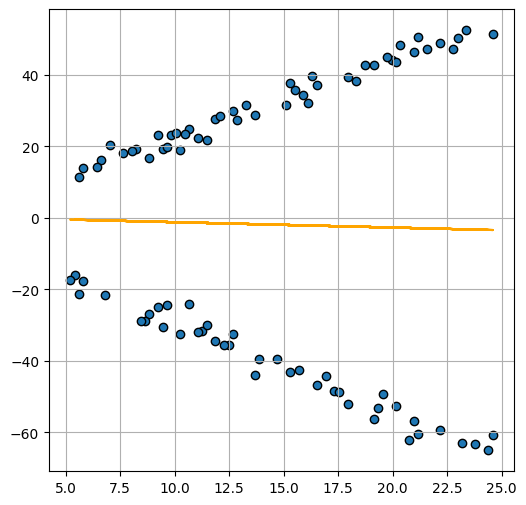

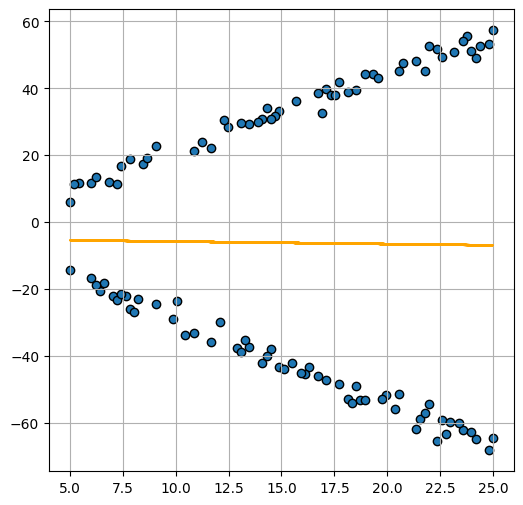

In [ ]:
plt.figure(figsize=(6, 6))
df_0 = f_2.loc[(f_2[2] == 0)]
a_0, b_0 = find_ab(df_0[0], df_0[3])
plt.scatter(df_0[0], df_0[3], edgecolor = 'black')
plt.plot(df_0[0], a_0 * df_0[0] + b_0, 'orange')
plt.grid()
plt.show()

plt.figure(figsize=(6, 6))
df_1 = f_2.loc[(f_2[2] == 1)]
a_1, b_1 = find_ab(df_1[0], df_1[3])
plt.scatter(df_1[0], df_1[3], edgecolor = 'black')
plt.plot(df_1[0], a_1 * df_1[0] + b_1, 'orange')
plt.grid()
plt.show()

In [ ]:
n = f_2[0].size
k = 2
rss1 = sum((df_0[3] - (a_0 * df_0[0] + b_0))**2)
rss2 = sum((df_1[3] - (a_1 * df_1[0] + b_1))**2)
rss = sum((f_2[3] - (a * f_2[0] + b))**2)
f_stat = ((rss - rss1 - rss2) / k) / ((rss1 + rss2) / (n - 2 * k))
ppf = f.ppf(alpha, n - 2, n - 1)

print(f_stat, ' > ', ppf)
print("F-stat меньше критического значения, нулевая гипотеза принимается, деление выборки не приведет к улучшению результата")

0.2742372846270331  >  0.791286137568617
F-stat меньше критического значения, нулевая гипотеза принимается, деление выборки не приведет к улучшению результата


# File 3


a = -1.6883898316136372
b = -1.5571604163422492


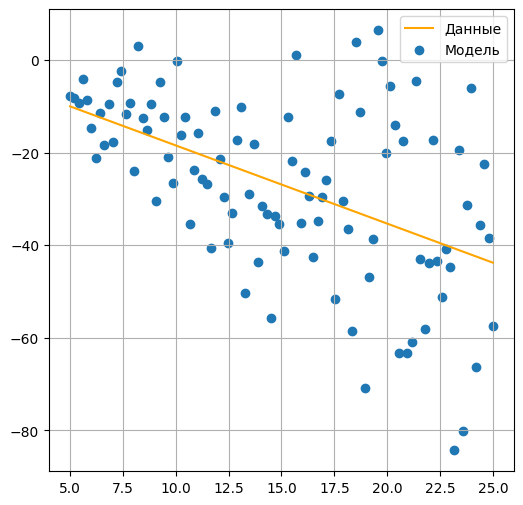

In [ ]:
a, b = find_ab(f_3[0], f_3[1])
print("a =", a)
print("b =", b)

plt.figure(figsize=(6, 6))
plt.plot(f_3[0], a * f_3[0] + b, 'orange', label="Данные")
plt.scatter(f_3[0], f_3[1], label="Модель")
plt.legend()
plt.grid()
plt.show()

##Адекватность

In [ ]:
n = len(f_3[0])
m_y = f_3[1].mean()

s2m = sum((f_3[1] - (a * f_3[0] + b))**2) / (n - 2)
s2o = sum((f_3[1] - m_y)**2) / (n - 1)

f_stat = max(s2m, s2o) / min(s2m, s2o)
ppf = f.ppf(alpha, n - 2, n - 1)

print(f_stat, ' > ', ppf)
print("F-stat больше критического значения, нулевая гипотеза отвергается, модель адекватна, дисперсии не равны")

1.3332997120321144  >  0.7165989462583362
F-stat больше критического значения, нулевая гипотеза отвергается, модель адекватна, дисперсии не равны


##Значимость

In [ ]:
ma = np.sqrt(s2m) / (np.std(x_3[0]) * np.sqrt(n))
mb = np.sqrt(s2m * sum(x_3[0]**2)) / (np.std(x_3[0]) * n)
ta = a / ma
tb = b / mb

crt = t.ppf(1 - alpha / 2, n - 2)
print(np.abs(ta), ' > ', crt, "Параметр а значимый")
print(np.abs(tb), ' < ', crt, "Параметр b не является значимым")

NameError: ignored

##Тест Спирмена

In [ ]:
f_3['e'] = np.abs(f_3[1] - (a * f_3[0] + b)) # остатки модели
f_3['rangX'] = f_3[0].rank(ascending=True) # ранжирование
f_3['rangE'] = f_3['e'].rank(ascending=True)

# коэффициент ранговой корреляции Спирмена
rs = 1 - (6 * sum((f_3['rangE'] - f_3['rangX'])**2)) / (n * (n**2 - 1))
t_stat = (rs * np.sqrt(n - 2)) / (np.sqrt(1 - rs**2))
ppf = t.ppf(1 - alpha / 2, n - 2)

print(np.abs(t_stat), ' > ', ppf)
print("Статистика больше критического значения, гетероскедастичноть присутствует")
print("Дисперсия вдоль линейной регрессионной зависимости неоднородна")

f_3

**Тест** Гольдфельда-Квандта

In [ ]:
f_3 = f_3.sort_values(by=0, ascending=False).reset_index(drop=True)
m = 3 * n // 8
xm1 = f_3.iloc[:m]
xm2 = f_3.iloc[n - m - 1:]

# сравнение дисперсии двух выборок
f_stat = (sum((a*xm1[0]+b - xm1[1])**2) / (xm1[0].size - 1))
f_stat /= (sum((a*xm2[0]+b - xm2[1])**2) / (xm2[0].size - 1))
ppf = f.ppf(alpha, xm1[0].size - 1, xm2[0].size - 1)

print(f_stat, ' > ', ppf)
print("F-stat больше критического значения, дисперсии не равны, а значит присутствует гетероскедастичность")